# Understand how to build CNN using Tensorflow and Keras

---

**IMPORTANT NOTES**
* This project is just to get use to how to create CNN Models
* Not to optimize on this model
* Hence, the focus should be on understanding the process! 
* Once you understand, you can optimize it as well ^_^
* THE FIRST FOCUS MUST BE TO UNDERSTAND!

# Credit: NASA and European Space Agency

* With each passing day telescopes around and above the Earth capture more and more images of distant galaxies.
* As better and bigger telescopes continue to collect these images, the datasets begin to explode in size.
* In order to better understand how the different shapes (or morphologies) of galaxies relate to the physics that create them, such images need to be sorted and classified.
* Galaxy Zoo data is made

https://www.kaggle.com/competitions/galaxy-zoo-the-galaxy-challenge/overview

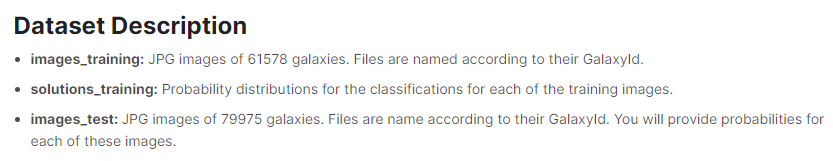

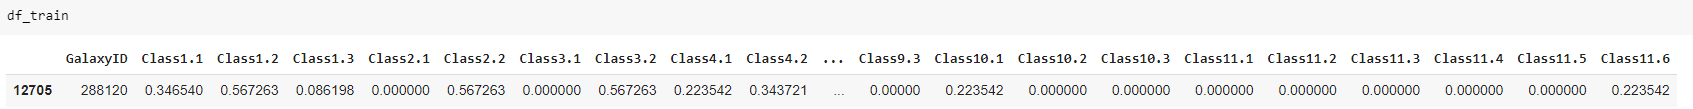



> The first column in each solution is labeled GalaxyID; this is a randomly-generated ID that only allows you to match the probability distributions with the images.





> The next 37 columns are all floating point numbers between 0 and 1 inclusive. These represent the morphology (or shape) of the galaxy in 37 different categories as identified by crowdsourced volunteer classifications as part of the Galaxy Zoo 2 project.





> These morphologies are related to probabilities for each category; a high number (close to 1) indicates that many users identified this morphology category for the galaxy with a high level of confidence. Low numbers for a category (close to 0) indicate the feature is likely not present.



## Step 1 : Get the dataset in notebook

**1)** In the right pane, search for Galaxy Zoo Dataset     
**2)** Add it to the notebook

In [2]:
# Create a Folder to store necessary data and name it as galaxy_zoo_dataset
import os

os.mkdir('galaxy_zoo_dataset')

In [ ]:
# Unzip the training images into the galaxy_zoo_dataset directory
!unzip /kaggle/input/galaxy-zoo-the-galaxy-challenge/images_training_rev1.zip -d /kaggle/working/galaxy_zoo_dataset

In [13]:
# Unzip the csv file for training (solution)
!unzip /kaggle/input/galaxy-zoo-the-galaxy-challenge/training_solutions_rev1.zip -d /kaggle/working/galaxy_zoo_dataset

Archive:  /kaggle/input/galaxy-zoo-the-galaxy-challenge/training_solutions_rev1.zip
replace /kaggle/working/galaxy_zoo_dataset/training_solutions_rev1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


## Step 2: Import libraries


In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import random

from skimage.transform import resize
from tqdm import tqdm 

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K
import keras


## Step 3: Read the csv file and train test split

In [15]:
# using read_csv of pandas read the solutions_rev1 csv file
csv_path = '/kaggle/working/galaxy_zoo_dataset/training_solutions_rev1.csv'
df = pd.read_csv(csv_path)

In [16]:
# Print the shape of data frame
df.shape

(61578, 38)

In [17]:
# Print the info of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61578 entries, 0 to 61577
Data columns (total 38 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   GalaxyID   61578 non-null  int64  
 1   Class1.1   61578 non-null  float64
 2   Class1.2   61578 non-null  float64
 3   Class1.3   61578 non-null  float64
 4   Class2.1   61578 non-null  float64
 5   Class2.2   61578 non-null  float64
 6   Class3.1   61578 non-null  float64
 7   Class3.2   61578 non-null  float64
 8   Class4.1   61578 non-null  float64
 9   Class4.2   61578 non-null  float64
 10  Class5.1   61578 non-null  float64
 11  Class5.2   61578 non-null  float64
 12  Class5.3   61578 non-null  float64
 13  Class5.4   61578 non-null  float64
 14  Class6.1   61578 non-null  float64
 15  Class6.2   61578 non-null  float64
 16  Class7.1   61578 non-null  float64
 17  Class7.2   61578 non-null  float64
 18  Class7.3   61578 non-null  float64
 19  Class8.1   61578 non-null  float64
 20  Class8

In [18]:
# Get the first 2000 rows into df_minimum
df_minimum = df.iloc[:2000,:]

In [19]:
# Check the shape to see if everything is as we expect
df_minimum.shape

(2000, 38)

In [21]:
# Check 10 random samples in the df_minimum
df_minimum.sample(10)

GalaxyID  Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  \
1009    115191  0.490662  0.437249  0.072089  0.000000  0.437249  0.098943   
818     112188  0.216396  0.765944  0.017660  0.141481  0.624463  0.000000   
1011    115247  0.126992  0.858072  0.014936  0.041955  0.816117  0.062528   
728     110763  0.133651  0.852267  0.014083  0.060495  0.791772  0.126868   
519     107539  0.714531  0.259517  0.025952  0.000000  0.259517  0.027699   
1840    127552  0.079757  0.909270  0.010973  0.000000  0.909270  0.113774   
1323    119876  0.329413  0.653706  0.016881  0.047717  0.605989  0.000000   
874     113168  0.289465  0.710535  0.000000  0.394500  0.316035  0.115590   
1325    119909  0.418130  0.561075  0.020795  0.056107  0.504968  0.174875   
537     107627  0.120436  0.871182  0.008382  0.000000  0.871182  0.141929   

      Class3.2  Class4.1  Class4.2  ...  Class9.3  Class10.1  Class10.2  \
1009  0.338306  0.384082  0.053167  ...  0.000000   0.384082   0.000000   
818   0.624463  0.343342  0.281121  ...  0.141481   0.167401   0.124327   
1011  0.753589  0.056431  0.759686  ...  0.034940   0.000000   0.000000   
728   0.664904  0.508976  0.282796  ...  0.025257   0.129872   0.220202   
519   0.231818  0.033244  0.226273  ...  0.000000   0.022174   0.011070   
1840  0.795496  0.512408  0.396862  ...  0.000000   0.163479   0.155789   
1323  0.605989  0.305759  0.300230  ...  0.000000   0.202798   0.000000   
874   0.200445  0.000000  0.316035  ...  0.194658   0.000000   0.000000   
1325  0.330092  0.249653  0.255315  ...  0.000000   0.000000   0.124826   
537   0.729253  0.560693  0.310489  ...  0.000000   0.032748   0.116062   

      Class10.3  Class11.1  Class11.2  Class11.3  Class11.4  Class11.5  \
1009   0.000000   0.000000   0.000000   0.000000        0.0        0.0   
818    0.051615   0.045481   0.000000   0.000000        0.0        0.0   
1011   0.056431   0.000000   0.000000   0.056431        0.0        0.0   
728    0.158902   0.028541   0.236639   0.000000        0.0        0.0   
519    0.000000   0.000000   0.011070   0.000000        0.0        0.0   
1840   0.193140   0.471529   0.000000   0.000000        0.0        0.0   
1323   0.102961   0.000000   0.000000   0.000000        0.0        0.0   
874    0.000000   0.000000   0.000000   0.000000        0.0        0.0   
1325   0.124826   0.000000   0.000000   0.000000        0.0        0.0   
537    0.411882   0.125724   0.392986   0.000000        0.0        0.0   

      Class11.6  
1009   0.384082  
818    0.297861  
1011   0.000000  
728    0.243796  
519    0.022174  
1840   0.040879  
1323   0.305759  
874    0.000000  
1325   0.249653  
537    0.041982  

[10 rows x 38 columns]

In [22]:
# Split the df_minimum into df_train, df_test with test size as 15% and shuffle=True
df_train, df_test = train_test_split(df_minimum, test_size=0.15, shuffle = True)

# Check the shape of df_dtrain, df_test
print(f'The shape of df_train:- {df_train.shape}')
print(f'\nThe shape of df_test:- {df_test.shape}')

The shape of df_train:- (1700, 38)

The shape of df_test:- (300, 38)


## Step 4 : Visualize Random Images

In [53]:
# Take random image from train images and plot it with galaxy id and shape as title
train_dir = '/kaggle/working/galaxy_zoo_dataset/images_training_rev1'
ids_ = np.array(df.iloc[:, 0], dtype='str')
random_id = random.choice(ids_)
img_path = f'{train_dir}/{random_id}.jpg'
img_arr = plt.imread(img_path)
plt.title(f'Galaxy ID:- {random_id}\nShape:- {img_arr.shape}', color='tab:pink')
plt.imshow(img_arr)
#plt.axis('off')
plt.show()

# Step 5: Preprocessing images

In [55]:
# Create a function that will convert the image path to preprocessed output of array of input image
def get_image(path, x1,y1, shape, crop_size):  # Getting arguments - path,x1=84,y1=84,shape=(64,64),crop_size=(256,256)
    '''
    Parameters
    ----------
    path (str) - Path of the image
    x1 (int) - Start row pixel to begin the cropping
    y1 (int) - Start col pixel to begin the cropping
    shape (tuple) - Shape to resize the output
    crop_size (tuple) - how much to crop from x1 and y1
    
    Return
    ------
    x - Preprocessed output focusing on the central part of the image
    '''
    x = plt.imread(path)                           # Reading using pyplot
    x = x[x1:x1+crop_size[0], y1:y1+crop_size[1]]  # Cropping using nupy slicing
    x = resize(x, shape)                           # Resizing using skimage
    x = x/255.0                                    # Normalizing pixels
    return x                                       # Preprocessed output

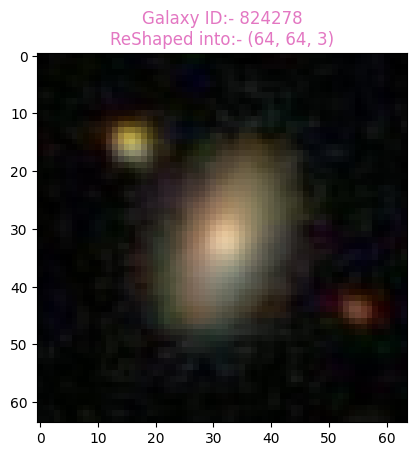

In [56]:
# Check the function
x_data = get_image(img_path, 84, 84, (64,64), (256, 256))
plt.imshow(x_data*255)
plt.title(f'Galaxy ID:- {random_id}\nReShaped into:- {x_data.shape}', color = 'tab:pink')
plt.show()

In [64]:
arr = df_train.values
arr[:, 1:]

array([[0.288297  , 0.701849  , 0.009854  , ..., 0.        , 0.        ,
        0.16023231],
       [0.085222  , 0.889448  , 0.025331  , ..., 0.        , 0.        ,
        0.01955005],
       [0.618786  , 0.312107  , 0.069107  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.170471  , 0.829529  , 0.        , ..., 0.        , 0.        ,
        0.06342247],
       [0.881342  , 0.087781  , 0.030876  , ..., 0.        , 0.        ,
        0.        ],
       [0.755321  , 0.12615   , 0.118529  , ..., 0.        , 0.        ,
        0.        ]])

In [65]:
# Implement this for all images in df_train and df_test

ORIG_SHAPE = (424,424)
CROP_SIZE = (256,256)
IMG_SHAPE = (64,64)

def get_all_images(dataframe, shape=IMG_SHAPE, crop_size=CROP_SIZE):
    """
    Parameters
    ----------
    dataframe: The dataframe input
    shape: Shape for resizing 
    crop_size: Cropping the center part of the image
    
    Return
    ------
    x_batch (arr): The input preprocessed images for the model
    y_bach (arr): The output batch that is prob. values for respective input image
    """

    # Get the centre of the image where region of interest is present
    x1 = (ORIG_SHAPE[0] - crop_size[0])//2    # (424 - 256) // 2 = 84
    y1 = (ORIG_SHAPE[1] - crop_size[1])//2    # (424 - 256) // 2 = 84

    # Form x and y batches
    df_arr = dataframe.values                           # Convert the df to array
    gal_ids = df_arr[:, 0].astype(int).astype(str)      # Convert Galaxy IDs into str format
    y_batch = df_arr[:, 1:]                             # Get the y_batch
    x_batch = []                                        # Initiate the empty list to store each images from df
    
    # For loop to generate x_batch
    for id in tqdm(gal_ids):                            # tqdm will help to track the progress
        path = f'{train_dir}/{id}.jpg'                  # Define the image path using id
        x = get_image(path, x1,y1, shape, crop_size)    # Use the get_image func to apply preprocessing
        x_batch.append(x)                               # Append this preprocessed input to x_batch list
    x_batch = np.array(x_batch)                         # Numpy array of preprocessed input images

    # Return the batches
    return x_batch, y_batch

In [66]:
# Get all training and testing images preprocessed
X_train, y_train = get_all_images(df_train)
X_test, y_test = get_all_images(df_test)

100%|██████████| 300/300 [00:02<00:00, 147.28it/s]


In [67]:
# Check the shape of dataset -> Train and Test
data_tuple = (X_train, y_train, X_test, y_test)
names_data = ('X_train', 'y_train', 'X_test', 'y_test')
for i, data in enumerate(data_tuple):
    print(f'The shape of {names_data[i]}:- {data.shape}')

The shape of X_train:- (1700, 64, 64, 3)
The shape of y_train:- (1700, 37)
The shape of X_test:- (300, 64, 64, 3)
The shape of y_test:- (300, 37)


# Step 6 is to make the model with RMSE as the evaluation metric

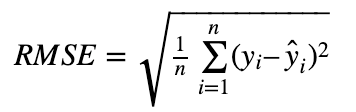

In [68]:
# Function that calculates RMSE
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [76]:
# 1) Initiate the Model --> Sequential API
# 2) Allow us to add layers in sequence
# 3) Input Layer --> Conv --> Conv --> Max Pool --> Flatten --> Dense ---> Dropout -->  Dense (output)

# Create a Sequation model as defined above
model = Sequential() 
model.add(Conv2D(filters = 512, kernel_size = (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
model.add(Conv2D(filters = 256, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(37, activation='sigmoid'))

# Compile the model
model.compile(loss='mse',optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics = [root_mean_squared_error])

# Print the model summary
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 512)    │        14,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 60, 60, 256)    │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 30, 30, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 230400)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    29,491,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 37)             │         4,773 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,690,341 (117.07 MB)

 Trainable params: 30,690,341 (117.07 MB)

 Non-trainable params: 0 (0.00 B)

# Step 7 is to fit the model

In [79]:
# 1700 --> Batches --> Batch_size = 32 ---> 53.125 batches ---> 53 or 54
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=None)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 0.0285 - root_mean_squared_error: 0.1686 - val_loss: 0.0281 - val_root_mean_squared_error: 0.1656
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 0.0274 - root_mean_squared_error: 0.1652 - val_loss: 0.0287 - val_root_mean_squared_error: 0.1676
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 0.0272 - root_mean_squared_error: 0.1642 - val_loss: 0.0280 - val_root_mean_squared_error: 0.1659
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 0.0275 - root_mean_squared_error: 0.1655 - val_loss: 0.0280 - val_root_mean_squared_error: 0.1658
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 0.0274 - root_mean_squared_error: 0.1654 - val_loss: 0.0280 - val_root_mean_squared_error: 0.1655
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 0.0266 - root_mean_squared_error: 0.1629 - val_loss: 0.0280 - val_root_mean_squared_error: 0.1661
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss:

In [80]:
pred_test = np.array(model.predict(X_test))

 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

W0000 00:00:1714414846.871161     882 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


In [81]:
y_test_df = pd.DataFrame(y_test, columns = list(df_minimum.columns[1:]))
y_test_df.head()

Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  Class3.2  \
0  0.820323  0.096005  0.083671  0.096005  0.000000  0.000000  0.000000   
1  0.102801  0.882234  0.014964  0.000000  0.882234  0.455037  0.427197   
2  0.229958  0.770042  0.000000  0.770042  0.000000  0.000000  0.000000   
3  0.015724  0.984276  0.000000  0.017847  0.966429  0.579945  0.386484   
4  0.148617  0.851383  0.000000  0.000000  0.851383  0.099579  0.751804   

   Class4.1  Class4.2  Class5.1  ...  Class9.3  Class10.1  Class10.2  \
0  0.000000  0.000000  0.000000  ...  0.000000   0.000000   0.000000   
1  0.834197  0.048037  0.124146  ...  0.000000   0.295273   0.490344   
2  0.000000  0.000000  0.000000  ...  0.185237   0.000000   0.000000   
3  0.805267  0.161162  0.070032  ...  0.000000   0.039255   0.136172   
4  0.640545  0.210838  0.000000  ...  0.000000   0.266964   0.373580   

   Class10.3  Class11.1  Class11.2  Class11.3  Class11.4  Class11.5  Class11.6  
0   0.000000   0.000000   0.000000   0.000000   0.000000        0.0   0.000000  
1   0.048579   0.160047   0.409331   0.130931   0.000000        0.0   0.133888  
2   0.000000   0.000000   0.000000   0.000000   0.000000        0.0   0.000000  
3   0.629840   0.177757   0.627510   0.000000   0.000000        0.0   0.000000  
4   0.000000   0.000000   0.182927   0.000000   0.125269        0.0   0.332348  

[5 rows x 37 columns]

In [82]:
pred_test_df = pd.DataFrame(pred_test, columns = list(df_minimum.columns[1:]))
pred_test_df.head()

Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  Class3.2  \
0   0.43179  0.540338  0.020562  0.101656   0.43909  0.094934   0.34452   
1   0.43179  0.540338  0.020562  0.101656   0.43909  0.094934   0.34452   
2   0.43179  0.540338  0.020562  0.101656   0.43909  0.094934   0.34452   
3   0.43179  0.540338  0.020562  0.101656   0.43909  0.094934   0.34452   
4   0.43179  0.540338  0.020562  0.101656   0.43909  0.094934   0.34452   

   Class4.1  Class4.2  Class5.1  ...  Class9.3  Class10.1  Class10.2  \
0  0.229109  0.212407  0.036815  ...  0.031055   0.098796   0.084406   
1  0.229109  0.212407  0.036815  ...  0.031055   0.098796   0.084406   
2  0.229109  0.212407  0.036815  ...  0.031055   0.098796   0.084406   
3  0.229109  0.212407  0.036815  ...  0.031055   0.098796   0.084406   
4  0.229109  0.212407  0.036815  ...  0.031055   0.098796   0.084406   

   Class10.3  Class11.1  Class11.2  Class11.3  Class11.4  Class11.5  Class11.6  
0   0.035379   0.013205   0.089337   0.016018   0.006743   0.007558   0.075387  
1   0.035379   0.013205   0.089337   0.016018   0.006743   0.007558   0.075387  
2   0.035379   0.013205   0.089337   0.016018   0.006743   0.007558   0.075387  
3   0.035379   0.013205   0.089337   0.016018   0.006743   0.007558   0.075387  
4   0.035379   0.013205   0.089337   0.016018   0.006743   0.007558   0.075387  

[5 rows x 37 columns]

In [83]:
print(np.array(root_mean_squared_error(y_test_df.values, pred_test_df.values)))

0.16706935513127527
